In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [4]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")
df

rides_t-672  rides_t-671  rides_t-670  rides_t-669  rides_t-668  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
87615           25           14            5            3            7   
87616           30            7            9            6            5   
87617           50           26           17            9            8   
87618          117           88           39           19           14   
87619          120           82           61           41           13   

       rides_t-667  rides_t-666  rides_t-665  rides_t-664  rides_t-663  ...  \
0                0            0            0            0            0  ...   
1                0            0            0            0            0  ...   
2                0            0            0            0            0  ...   
3                0            0            0            0            0  ...   
4                0            0            0            0            0  ...   
...            ...          ...          ...          ...          ...  ...   
87615           16           53          133          126          136  ...   
87616           23           58          123          136          108  ...   
87617           11           43          116          137          132  ...   
87618           12           27           37           70           97  ...   
87619           12           26           37           45           99  ...   

       rides_t-7  rides_t-6  rides_t-5  rides_t-4  rides_t-3  rides_t-2  \
0              1          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
87615         62         62         58         50         48         42   
87616         64         79         65         71         72         75   
87617         81         78         60         85         63         62   
87618         84         75        100         98         88         77   
87619         85         76         95         68         76         71   

       rides_t-1  pickup_hour  location_id  target  
0              0   2023-01-29            2       0  
1              0   2023-01-30            2       0  
2              0   2023-01-31            2       0  
3              0   2023-02-01            2       0  
4              0   2023-02-02            2       0  
...          ...          ...          ...     ...  
87615         37   2023-12-27          263      12  
87616         35   2023-12-28          263      19  
87617         37   2023-12-29          263      38  
87618         69   2023-12-30          263      59  
87619         61   2023-12-31          263      65  

[87620 rows x 675 columns]

In [5]:
from datetime import datetime

from src.data_utils import split_time_series_data

X_train, y_train, X_test, y_test = split_time_series_data(
    df,
    cutoff_date=datetime(2023, 9, 1, 0, 0, 0),
    target_column="target"
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55900, 674)
(55900,)
(31720, 674)
(31720,)


In [7]:
X_train

rides_t-672  rides_t-671  rides_t-670  rides_t-669  rides_t-668  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
55895           90           64           43           20           13   
55896           18           12            5            5            4   
55897           12           11           10            5            4   
55898           26           11            8            0            8   
55899           34           16           12            5           11   

       rides_t-667  rides_t-666  rides_t-665  rides_t-664  rides_t-663  ...  \
0                0            0            0            0            0  ...   
1                0            0            0            0            0  ...   
2                0            0            0            0            0  ...   
3                0            0            0            0            0  ...   
4                0            0            0            0            0  ...   
...            ...          ...          ...          ...          ...  ...   
55895           11           16           29           48           61  ...   
55896           22           48           74           95          109  ...   
55897           15           44           97          118          107  ...   
55898           10           44           97          126          121  ...   
55899           21           52           80          119          127  ...   

       rides_t-8  rides_t-7  rides_t-6  rides_t-5  rides_t-4  rides_t-3  \
0              0          1          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
55895         76         91         97        101         80         94   
55896         90         80         80         72         91         67   
55897         59         79         84         69         80         57   
55898         75         92         91         95         72         68   
55899         71         96         87         77         79         87   

       rides_t-2  rides_t-1  pickup_hour  location_id  
0              0          0   2023-01-29            2  
1              0          0   2023-01-30            2  
2              0          0   2023-01-31            2  
3              0          0   2023-02-01            2  
4              0          0   2023-02-02            2  
...          ...        ...          ...          ...  
55895        100         69   2023-08-27          263  
55896         53         26   2023-08-28          263  
55897         37         20   2023-08-29          263  
55898         63         30   2023-08-30          263  
55899         57         37   2023-08-31          263  

[55900 rows x 674 columns]

In [8]:
past_ride_columns = [c for c in X_train.columns if c.startswith("rides_")]
X_train_only_numeric = X_train[past_ride_columns]
X_test_only_numeric = X_test[past_ride_columns]

In [9]:
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=10)
model.fit(X_train_only_numeric, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test_only_numeric)

In [11]:
test_mae = mean_absolute_error(y_test, predictions)
print(f"{test_mae:.4f}")

3.4586


In [12]:
from src.experiment_utils import set_mlflow_tracking, log_model_to_mlflow
from dotenv import load_dotenv
import os
load_dotenv() 

mlflow = set_mlflow_tracking()
log_model_to_mlflow(model, X_test_only_numeric, "XGBoost", "mean_absolute_error", score=test_mae)

INFO:src.experiment_utils:MLflow tracking URI and credentials set.
INFO:src.experiment_utils:Experiment set to: XGBoost
INFO:src.experiment_utils:Logged mean_absolute_error: 3.458620516579825
C:\Users\mkhaw\anaconda3\envs\sp25_taxi\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
INFO:src.experiment_utils:Model signat

2025/02/04 18:24:23 INFO mlflow.models.model: Found the following environment variables used during model inference: [HOPSWORKS_API_KEY]. Please check if you need to set them when deploying the model. To disable this message, set environment variable `MLFLOW_RECORD_ENV_VARS_IN_MODEL_LOGGING` to `false`.
Registered model 'XGBRegressor' already exists. Creating a new version of this model...
2025/02/04 18:26:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor, version 2
Created version '2' of model 'XGBRegressor'.
INFO:src.experiment_utils:Model logged with name: XGBRegressor


🏃 View run funny-roo-771 at: https://dagshub.com/mkzia/sp25_taxi.mlflow/#/experiments/2/runs/5f75ebc71f084cdf92bb16d1424c81c6
🧪 View experiment at: https://dagshub.com/mkzia/sp25_taxi.mlflow/#/experiments/2


In [1]:
# Load required libraries
import mlflow
import mlflow.xgboost
import numpy as np
import pandas as pd
import xgboost as xgb
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load dataset
from src.config import TRANSFORMED_DATA_DIR
from src.data_utils import split_time_series_data

df = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")

# Train-test split
X_train, y_train, X_test, y_test = split_time_series_data(
    df, cutoff_date=datetime(2023, 9, 1, 0, 0, 0), target_column="target"
)

# Select numeric features
past_ride_columns = [c for c in X_train.columns if c.startswith("rides_")]
X_train_only_numeric = X_train[past_ride_columns]
X_test_only_numeric = X_test[past_ride_columns]

# Set up MLflow
mlflow.set_experiment("NYC_Taxi_XGBoost_Tuning")
mlflow.xgboost.autolog()

# Step 1: Tune learning_rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
best_mae = float("inf")
best_lr = None

for lr in learning_rates:
    with mlflow.start_run(nested=True):  # Nested run for MLflow logging
        model = xgb.XGBRegressor(learning_rate=lr, max_depth=6, n_estimators=100)
        model.fit(X_train_only_numeric, y_train)

        predictions = model.predict(X_test_only_numeric)
        test_mae = mean_absolute_error(y_test, predictions)

        mlflow.log_param("learning_rate", lr)
        mlflow.log_metric("test_MAE", test_mae)

        print(f"Learning Rate: {lr} | MAE: {test_mae}")

        if test_mae < best_mae:
            best_mae = test_mae
            best_lr = lr

print(f"Best Learning Rate: {best_lr}")

# Step 2: Tune max_depth & n_estimators with best learning_rate
max_depths = [3, 6, 9]
n_estimators = [50, 100, 200]
best_model = None

for depth in max_depths:
    for estimators in n_estimators:
        with mlflow.start_run(nested=True):  # Nested run for MLflow logging
            model = xgb.XGBRegressor(learning_rate=best_lr, max_depth=depth, n_estimators=estimators)
            model.fit(X_train_only_numeric, y_train)

            predictions = model.predict(X_test_only_numeric)
            test_mae = mean_absolute_error(y_test, predictions)

            mlflow.log_params({"max_depth": depth, "n_estimators": estimators})
            mlflow.log_metric("test_MAE", test_mae)

            print(f"Max Depth: {depth} | N Estimators: {estimators} | MAE: {test_mae}")

            if test_mae < best_mae:
                best_mae = test_mae
                best_model = model

print("Final best MAE:", best_mae)
mlflow.xgboost.log_model(best_model, artifact_path="best_xgboost_model")


2025/03/02 15:24:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Learning Rate: 0.01 | MAE: 7.829193592071533


2025/03/02 15:24:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Learning Rate: 0.05 | MAE: 3.2553012371063232


2025/03/02 15:24:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Learning Rate: 0.1 | MAE: 3.188236713409424


2025/03/02 15:24:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Learning Rate: 0.2 | MAE: 3.2859983444213867


2025/03/02 15:24:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Learning Rate: 0.3 | MAE: 3.3395347595214844
Best Learning Rate: 0.1


2025/03/02 15:24:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:24:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 3 | N Estimators: 50 | MAE: 3.6702916622161865


2025/03/02 15:25:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 3 | N Estimators: 100 | MAE: 3.531266689300537


2025/03/02 15:25:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 3 | N Estimators: 200 | MAE: 3.394533395767212


2025/03/02 15:25:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 6 | N Estimators: 50 | MAE: 3.2367780208587646


2025/03/02 15:25:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 6 | N Estimators: 100 | MAE: 3.188236713409424


2025/03/02 15:25:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 6 | N Estimators: 200 | MAE: 3.166055917739868


2025/03/02 15:25:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:25:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 9 | N Estimators: 50 | MAE: 3.282578945159912


2025/03/02 15:26:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:26:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 9 | N Estimators: 100 | MAE: 3.237187147140503


2025/03/02 15:26:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/03/02 15:26:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/lib/python3.12/site-packages/xgboost/co

Max Depth: 9 | N Estimators: 200 | MAE: 3.229280710220337
Final best MAE: 3.166056


2025/03/02 15:26:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


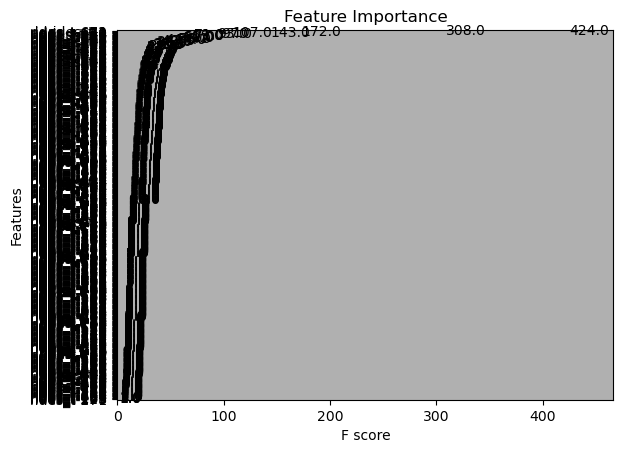

In [4]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model, importance_type="weight")
plt.title("Feature Importance")
plt.show()


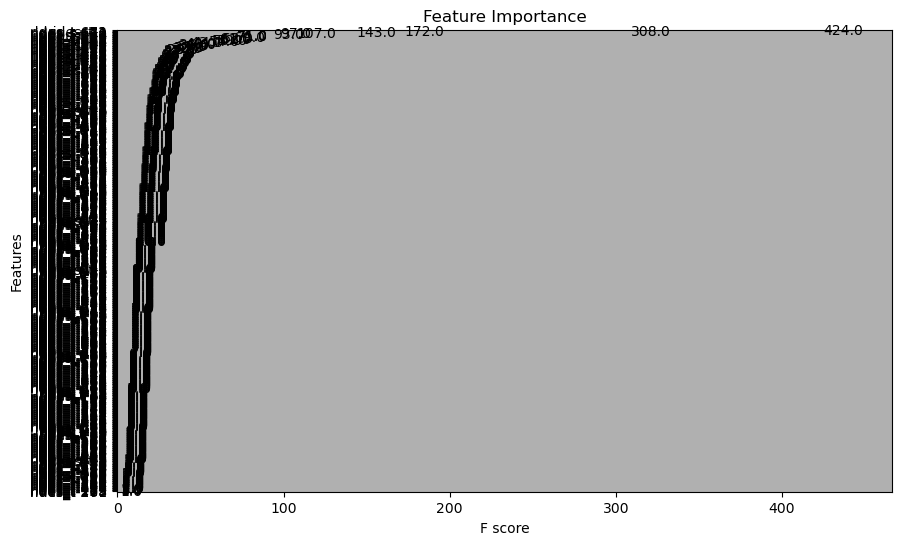

In [3]:
import matplotlib.pyplot as plt
import xgboost as xgb
import mlflow

# Generate Feature Importance Plot
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type="weight", ax=ax)
plt.title("Feature Importance")

# Save the figure locally
feature_importance_path = "feature_importance.png"
plt.savefig(feature_importance_path)

# Log the figure to MLFlow (DagsHub)
mlflow.log_artifact(feature_importance_path)
plt.show()
